In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings('ignore') 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("./data/pre_processed_cat_credit.csv")
df.head(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small,0.104167,0.005000,0.01114
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium,0.572917,0.000182,0.00234


In [3]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [4]:
df.isnull().sum()

person_age                     0
person_income                  0
person_home_ownership          0
person_emp_length              0
loan_intent                    0
loan_grade                     0
loan_amnt                      0
loan_int_rate                  0
loan_status                    0
loan_percent_income            0
cb_person_default_on_file      0
cb_person_cred_hist_length     0
age_group                     29
income_group                   0
loan_amount_group              0
loan_to_income_ratio           0
loan_to_emp_length_ratio       0
int_rate_to_loan_amt_ratio     0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
age_group                     0
income_group                  0
loan_amount_group             0
loan_to_income_ratio          0
loan_to_emp_length_ratio      0
int_rate_to_loan_amt_ratio    0
dtype: int64

In [7]:
df.head(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small,0.104167,0.005000,0.01114
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium,0.572917,0.000182,0.00234


In [8]:
y = df["loan_status"]

In [9]:
df.drop(['loan_status'],  axis =1 ,inplace=True)

In [10]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'age_group', 'income_group',
       'loan_amount_group', 'loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [12]:
X_train.shape

(19162, 17)

In [13]:
X_test.shape

(9439, 17)

In [14]:
y_train.shape

(19162,)

In [15]:
y_test.shape

(9439,)

In [16]:
categorical_features_indices = np.where(X_train.dtypes != np.float)[0]

In [17]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=50, depth=3, learning_rate=0.1, loss_function='CrossEntropy')
model.fit(X_train, y_train,cat_features=categorical_features_indices)

0:	learn: 0.6346476	total: 175ms	remaining: 8.59s
1:	learn: 0.5850502	total: 189ms	remaining: 4.54s
2:	learn: 0.5439741	total: 205ms	remaining: 3.21s
3:	learn: 0.5098914	total: 218ms	remaining: 2.51s
4:	learn: 0.4811931	total: 234ms	remaining: 2.1s
5:	learn: 0.4566315	total: 248ms	remaining: 1.81s
6:	learn: 0.4357975	total: 262ms	remaining: 1.61s
7:	learn: 0.4182059	total: 276ms	remaining: 1.45s
8:	learn: 0.4030884	total: 290ms	remaining: 1.32s
9:	learn: 0.3895629	total: 304ms	remaining: 1.21s
10:	learn: 0.3786007	total: 317ms	remaining: 1.12s
11:	learn: 0.3684453	total: 331ms	remaining: 1.05s
12:	learn: 0.3607646	total: 345ms	remaining: 982ms
13:	learn: 0.3529859	total: 359ms	remaining: 923ms
14:	learn: 0.3453305	total: 377ms	remaining: 880ms
15:	learn: 0.3362404	total: 392ms	remaining: 834ms
16:	learn: 0.3283527	total: 406ms	remaining: 789ms
17:	learn: 0.3212529	total: 420ms	remaining: 747ms
18:	learn: 0.3152073	total: 434ms	remaining: 708ms
19:	learn: 0.3091667	total: 447ms	remainin

In [18]:
y_pred_catboost = model.predict(X_test)

In [19]:
y_pred_catboost

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_catboost)

array([[7261,  109],
       [ 704, 1365]], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_catboost)

0.9138679944909418

In [22]:
from sklearn.metrics import classification_report
print("Classification report - \n", classification_report(y_test,y_pred_catboost))

Classification report - 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7370
           1       0.93      0.66      0.77      2069

    accuracy                           0.91      9439
   macro avg       0.92      0.82      0.86      9439
weighted avg       0.91      0.91      0.91      9439



In [23]:
probability_predictions = model.predict_proba(X_test)

In [24]:
from sklearn.metrics import log_loss, roc_auc_score, classification_report

### Log loss 

In [25]:
log_loss_value = log_loss(y_test, probability_predictions[:,1])
print(f'Log Loss: {log_loss_value}')

Log Loss: 0.24894097606771615


### ROC AUC 

In [26]:
roc_auc = roc_auc_score(y_test, probability_predictions[:,1])
print(f'ROC AUC: {roc_auc}')

ROC AUC: 0.9328381161987418


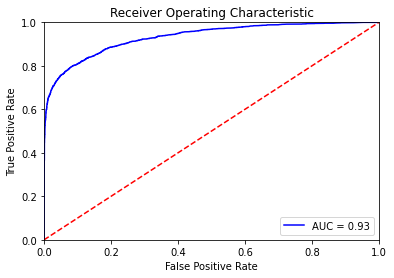

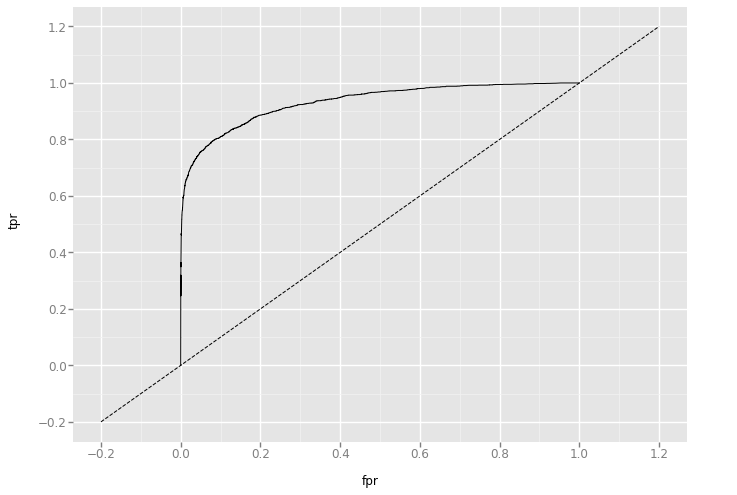

<ggplot: (180143101639)>

In [28]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')